<a href="https://colab.research.google.com/github/julioclerio/ml-svm/blob/main/notebook/exercicio_2_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [68]:
df = pd.read_csv("/content/german_credit_data.csv")

In [61]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
df.count()

Unnamed: 0          1000
Age                 1000
Sex                 1000
Job                 1000
Housing             1000
Saving accounts      817
Checking account     606
Credit amount       1000
Duration            1000
Purpose             1000
Risk                1000
dtype: int64

In [69]:
df["Risk"].value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [72]:
# Separação de características e alvo
X = df.drop(['Risk', 'Unnamed: 0'], axis=1)
y = df["Risk"]

# Divisão em conjuntos de treino e teste ANTES do pré-processamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

# Identificação de características categóricas e numéricas nos dados de treino
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Criação de pipelines para pré-processamento
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value = 'unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Transformador de coluna para processamento conjunto
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Aplicação do pré-processador nos conjuntos de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



# Hiperparâmetros do SVM

## 1. C: Parâmetro de Regularização
### O que é?
C é um parâmetro que ajuda a controlar a quantidade de regularização no modelo. A regularização é uma técnica usada para evitar o sobreajuste, garantindo que o modelo não se torne excessivamente complexo.

### Funcionamento
Um valor pequeno de C permite que o modelo tenha uma maior margem de erro, ou seja, pode classificar erroneamente mais pontos de dados. Um valor maior de C faz com que o modelo tente classificar todos os pontos de treinamento corretamente, o que pode levar ao sobreajuste.

## 2. gamma: Parâmetro Gamma para o Kernel RBF
### O que é?
gamma é um parâmetro específico para o kernel RBF (Radial Basis Function). Ele controla a influência de um único ponto de treinamento.

### Funcionamento
- Um valor baixo de gamma significa que cada ponto tem uma influência mais ampla - ou seja, considera um alcance maior de pontos em sua proximidade.
- Um valor alto de gamma significa que cada ponto tem uma influência mais localizada. Com um gamma alto, o modelo pode capturar detalhes e ruídos nos dados, potencialmente levando ao sobreajuste.

## 3. kernel: Tipo de Kernel
### O que é?
O kernel é uma função matemática usada pelo SVM para transformar os dados de entrada de modo que um hiperplano possa ser encontrado em um espaço de dimensão superior.

### Tipos Comuns
- **Linear**: Simples e usado para dados linearmente separáveis.
- **Polinomial**: Bom para capturar relações mais complexas; depende do grau do polinômio.
- **RBF (Radial Basis Function)**: Muito flexível e capaz de criar limites de decisão complexos.
- **Sigmoid**: Semelhante a uma função de ativação de rede neural.

## 4. degree: Grau para o Kernel Polinomial
### O que é?
degree especifica o grau do polinômio no kernel polinomial.

### Funcionamento
- Um grau maior significa um polinômio mais complexo, o que pode capturar relações mais complicadas nos dados.
- No entanto, um grau muito alto pode levar ao sobreajuste, especialmente se o conjunto de dados não requer uma complexidade tão alta.

# Resumo
- **C**: Equilibra a complexidade do modelo e o grau de erros permitidos. Suavidade da margem de separação dos grupos de classificacao. Suavidade na fronteira de classificaçáo. Quando mais suave mais toleravel a erros.
- **Gamma**: Determina a abrangência da influência de cada ponto de dados (específico para RBF).
- **Kernel**: Escolhe a forma como os dados são transformados para encontrar um hiperplano adequado.
- **Degree**: Define a complexidade do kernel polinomial.


Melhores Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Precisão do Modelo no Teste: 0.6866666666666666
Acurácia: 0.6866666666666666

Métricas de avaliação de treino:
[[ 43 167]
 [  1 489]]


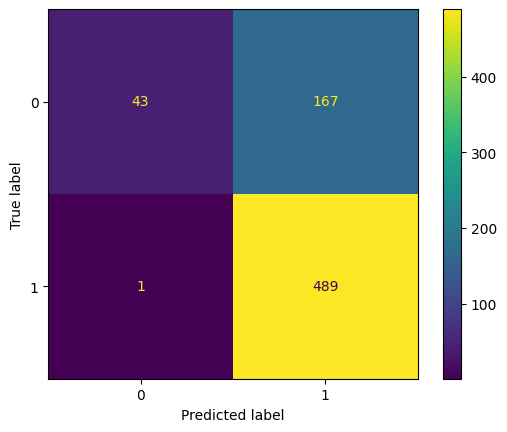

              precision    recall  f1-score   support

           0       0.98      0.20      0.34       210
           1       0.75      1.00      0.85       490

    accuracy                           0.76       700
   macro avg       0.86      0.60      0.60       700
weighted avg       0.81      0.76      0.70       700


Métricas de avaliação de teste:
[[  5  85]
 [  9 201]]


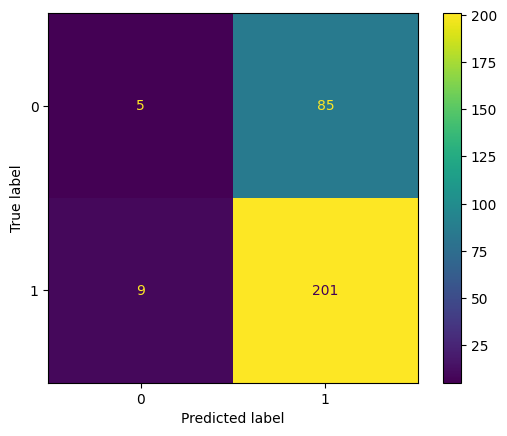

              precision    recall  f1-score   support

           0       0.36      0.06      0.10        90
           1       0.70      0.96      0.81       210

    accuracy                           0.69       300
   macro avg       0.53      0.51      0.45       300
weighted avg       0.60      0.69      0.60       300



In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definindo a grade de parâmetros para o Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Ampliando os valores de C
    'gamma': ['scale', 'auto', 0.1, 1],  # Mais opções para gamma
    'kernel': ['linear', 'poly', 'rbf'],  # Incluindo todos os kernels disponíveis
    'degree': [2, 3, 4]  # Diferentes graus para o kernel polinomial
}

# Configurando e executando o Grid Search
grid_search = GridSearchCV(SVC(),
                           param_grid,
                           refit=True,
                           verbose=0,
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Obtendo o melhor modelo e seus parâmetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Melhores Parâmetros: {best_params}")

# Realizando predições com o melhor modelo no conjunto de teste
y_pred_test = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)

grid_search.best_params_

# Avaliando o modelo
score = best_model.score(X_test_scaled, y_test)
print(f"Precisão do Modelo no Teste: {score}")

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Acurácia: {accuracy}")

print("\nMétricas de avaliação de treino:")
print(confusion_matrix(y_train, y_pred_train))
disp_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train))
disp_train.plot()
plt.show()
print(classification_report(y_train, y_pred_train))

print("\nMétricas de avaliação de teste:")
print(confusion_matrix(y_test, y_pred_test))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test))
disp_test.plot()
plt.show()
print(classification_report(y_test, y_pred_test))